In [ ]:
import keras
from sklearn.model_selection import train_test_split
# 패션 MNIST 데이터셋 로드
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [2]:
# 데이터 정규화: 0~1 범위로 변환
train_scaled = train_input / 255.0

# 훈련 세트와 검증 세트로 분할
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [5]:
# 모델 생성 함수 정의
def model_fn(a_layer = None):
    model = keras.Sequential()  # 순차 모델 생성
    model.add(keras.layers.Input(shape=(28, 28))) # 입력층: 28x28 이미지를 
    model.add(keras.layers.Flatten())   # 1차원으로 변환
    model.add(keras.layers.Dense(100, activation='relu')) # 은닉층: 100개의 뉴런, ReLU 활성화 함수 적용

    if a_layer: # 추가적인 층이 있을 경우
        model.add(a_layer) # 해당 층 추가

    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [6]:
model = model_fn()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- mode.fit() : verbose - 0 : 출력 x, 1: 학습 진행율, 정확도 , 로스, 에포크, 2: 정확도, 로스, 에포크

In [ ]:
# 모델 컴파일: 손실 함수 및 평가 지표 설정
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 모델 훈련: 에포크 수, 검증 데이터 포함
hist  = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7620 - loss: 0.6715
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8550 - loss: 0.4056
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8750 - loss: 0.3456
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8813 - loss: 0.3275
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8871 - loss: 0.3085  


In [8]:
hist.history

{'accuracy': [0.8117499947547913,
  0.8597291707992554,
  0.8737499713897705,
  0.882479190826416,
  0.8862500190734863],
 'loss': [0.5240204334259033,
  0.3894236385822296,
  0.3503473699092865,
  0.32812240719795227,
  0.3132999539375305]}

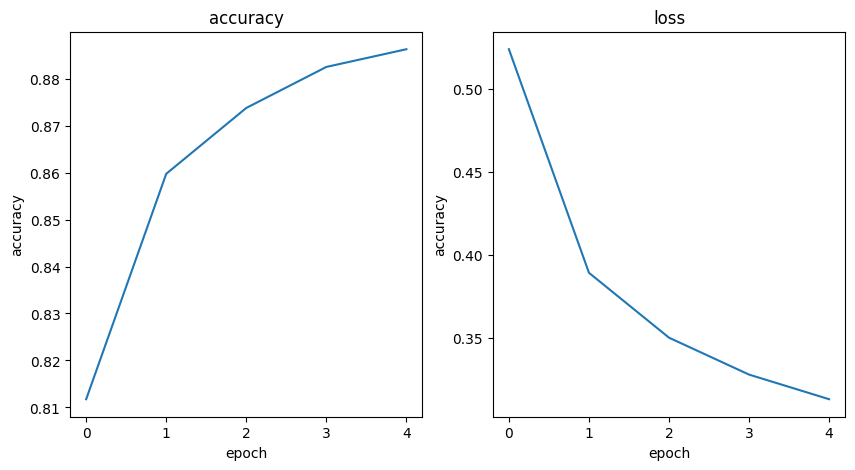

In [12]:
# 정확도, 로스
import matplotlib.pyplot as plt
_, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(hist.history['accuracy'])
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('accuracy')
axs[0].set_title('accuracy')

axs[1].plot(hist.history['loss'])
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('accuracy')
axs[1].set_title('loss')
plt.show()

In [ ]:
# 검증 손실
model = model_fn()
# 모델 컴파일: 손실 함수 및 평가 지표 설정
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 모델 훈련: 에포크 수, 검증 데이터 포함
hist = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7661 - loss: 0.6767 - val_accuracy: 0.8569 - val_loss: 0.4054
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8539 - loss: 0.4062 - val_accuracy: 0.8449 - val_loss: 0.4420
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8696 - loss: 0.3643 - val_accuracy: 0.8641 - val_loss: 0.3773
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8807 - loss: 0.3328 - val_accuracy: 0.8717 - val_loss: 0.3809
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8861 - loss: 0.3190 - val_accuracy: 0.8765 - val_loss: 0.3532
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8943 - loss: 0.2975 - val_accuracy: 0.8782 - val_loss: 0.3592
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8927 - loss: 0.2980 - val_accuracy: 0.8627 - val_loss: 0.4069
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9000 - loss: 0.2819 - 

In [17]:
hist.history

{'accuracy': [0.8136458396911621,
  0.8582916855812073,
  0.8716458082199097,
  0.8801666498184204,
  0.8867916464805603,
  0.890708327293396,
  0.8945624828338623,
  0.898145854473114,
  0.9018541574478149,
  0.9015833139419556,
  0.9061874747276306,
  0.9074375033378601,
  0.9095208048820496,
  0.9118541479110718,
  0.9126666784286499,
  0.9162708520889282,
  0.917395830154419,
  0.9178541898727417,
  0.9192291498184204,
  0.9212708473205566],
 'loss': [0.5326554775238037,
  0.3947710692882538,
  0.3581097722053528,
  0.33400920033454895,
  0.3181518614292145,
  0.3058083951473236,
  0.29742738604545593,
  0.28549081087112427,
  0.2810593545436859,
  0.2761874794960022,
  0.266841322183609,
  0.26250556111335754,
  0.25760549306869507,
  0.2534799873828888,
  0.24798884987831116,
  0.24347352981567383,
  0.23923593759536743,
  0.2357473522424698,
  0.23238946497440338,
  0.22850723564624786],
 'val_accuracy': [0.8569166660308838,
  0.8449166417121887,
  0.8640833497047424,
  0.871666

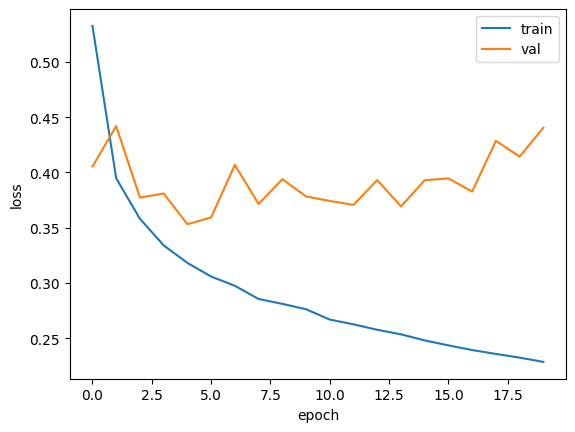

In [ ]:
# 훈련 손실 및 검증 손실 그래프 시각화
plt.plot(hist.history['loss'], label='train') # 훈련세트의 loss값
plt.plot(hist.history['val_loss'], label='val') # 검증세트의 loss값
plt.xlabel('epoch') # x축 레이블
plt.ylabel('loss') # y축 레이블
plt.legend() # 레전드 추가
plt.show() # 그래프 표시

In [22]:
# 옵티마이저 - adam
model = model_fn()
adam = keras.optimizers.Adam(learning_rate=0.001)   # learning_rate : 기본값 0.1

model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_scaled, train_target, epochs=50, validation_data=(val_scaled, val_target))

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7657 - loss: 0.6771 - val_accuracy: 0.8507 - val_loss: 0.4305
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8540 - loss: 0.4075 - val_accuracy: 0.8549 - val_loss: 0.3973
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8674 - loss: 0.3579 - val_accuracy: 0.8664 - val_loss: 0.3679
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8818 - loss: 0.3225 - val_accuracy: 0.8758 - val_loss: 0.3446
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8865 - loss: 0.3054 - val_accuracy: 0.8772 - val_loss: 0.3476
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8931 - loss: 0.2875 - val_accuracy: 0.8847 - val_loss: 0.3311
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9004 - loss: 0.2708 - val_accuracy: 0.8858 - val_loss: 0.3176
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9025 - loss: 0.2613 - 

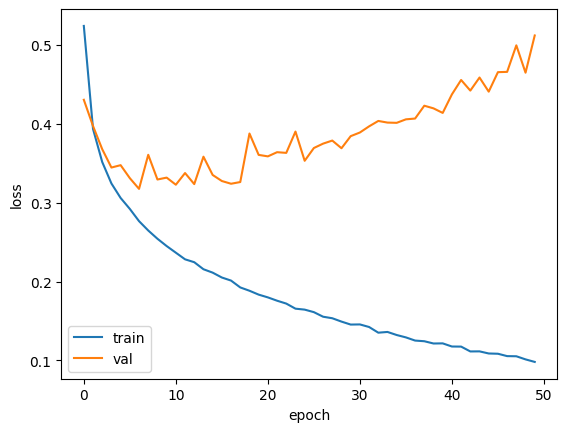

In [23]:
# 훈련 손실 및 검증 손실 그래프 시각화
plt.plot(hist.history['loss'], label='train') # 훈련세트의 loss값
plt.plot(hist.history['val_loss'], label='val') # 검증세트의 loss값
plt.xlabel('epoch') # x축 레이블
plt.ylabel('loss') # y축 레이블
plt.legend() # 레전드 추가
plt.show() # 그래프 표시

In [24]:
# 드롭아웃 : 설정된 비율만큰 은닉층의 출력을 랜덤하게 0으로 만든다 / 과대적합을 완화
model = model_fn(keras.layers.Dropout(0.3)) # 30% 정도 은닉층의 출력을 0으로 만든다.
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_scaled, train_target, epochs=50, validation_data=(val_scaled, val_target))

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7303 - loss: 0.7757 - val_accuracy: 0.8367 - val_loss: 0.4336
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8402 - loss: 0.4403 - val_accuracy: 0.8556 - val_loss: 0.3887
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8503 - loss: 0.4040 - val_accuracy: 0.8608 - val_loss: 0.3721
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8570 - loss: 0.3872 - val_accuracy: 0.8651 - val_loss: 0.3621
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8622 - loss: 0.3733 - val_accuracy: 0.8702 - val_loss: 0.3480
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8647 - loss: 0.3604 - val_accuracy: 0.8757 - val_loss: 0.3391
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8737 - loss: 0.3450 - val_accuracy: 0.8762 - val_loss: 0.3405
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8742 - loss: 0.3385 - 

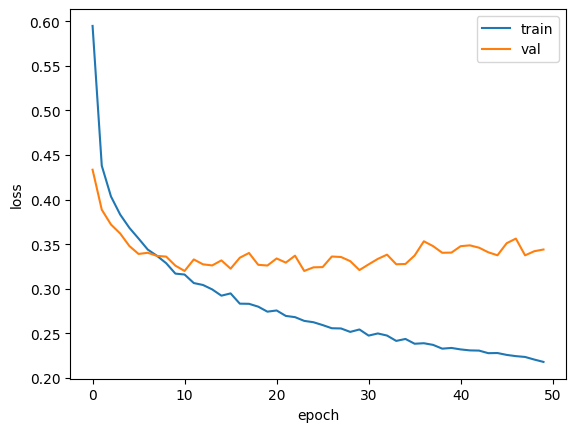

In [26]:
# 훈련 손실 및 검증 손실 그래프 시각화
plt.plot(hist.history['loss'], label='train') # 훈련세트의 loss값
plt.plot(hist.history['val_loss'], label='val') # 검증세트의 loss값
plt.xlabel('epoch') # x축 레이블
plt.ylabel('loss') # y축 레이블
plt.legend() # 레전드 추가
plt.show() # 그래프 표시

In [27]:
# 모델 저장, 복원 - 저장, 가중치 저장

# 가중치 저장 - model.save_weights('파일명') # 파일명 확장자 .weights.h5
model.save_weights("model.weights.h5")

In [28]:
# 모델 저장 : 구조 + 가중치 - model.save("파일명") # 파일명 확장자 .keras
model.save('model-whole.keras')

In [30]:
# 가중치 파일로 모델 복구 - 원래 모델의 구조가 필요 
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5')

In [33]:
import numpy as np

In [ ]:
test_scaled = test_input / 255.0
predictions = model.predict(test_scaled[:10])
np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [36]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.8840 - loss: 0.3814


[0.38555970788002014, 0.8830999732017517]

In [37]:
# 전체 모델을 저장한 파일로 복구 / 구조 + 가중치
model = keras.models.load_model('model-whole.keras')

In [38]:
predictions = model.predict(test_scaled[:10])
np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [39]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.8840 - loss: 0.3814


[0.38555970788002014, 0.8830999732017517]

In [ ]:
# 콜백 - ModelCheckpoint : 검증 세트의 손실이 가장 낮은 최고의 모델을 찾아서 저장
# 콜백 - EarlyStopping : 조기종료, patience : 검증 손실이 더이상 개선되지 않는 횟수
#       monitor=['val_loss'] : 기본값
#       restore_best_weights : 가장 최적의 가중치로 복구

In [43]:
model = model_fn(keras.layers.Dropout(0.3))
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 검증 세트의 손실값이 가장 낮은 모델로 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True) 

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

model.fit(train_scaled, train_target, epochs=50, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7273 - loss: 0.7750 - val_accuracy: 0.8472 - val_loss: 0.4272
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8393 - loss: 0.4522 - val_accuracy: 0.8572 - val_loss: 0.3853
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8543 - loss: 0.3996 - val_accuracy: 0.8714 - val_loss: 0.3632
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8626 - loss: 0.3763 - val_accuracy: 0.8683 - val_loss: 0.3577
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8662 - loss: 0.3659 - val_accuracy: 0.8773 - val_loss: 0.3380
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8743 - loss: 0.3440 - val_accuracy: 0.8777 - val_loss: 0.3389
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8751 - loss: 0.3377 - val_accuracy: 0.8764 - val_loss: 0.3413
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8786 - loss: 0.3284 - 

In [41]:
model = keras.models.load_model('best-model.keras')

In [42]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.8863 - loss: 0.3133


[0.3150951862335205, 0.8859999775886536]